In [ ]:
from pyspark import SparkContext
sc=SparkContext()

In [26]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
import os

### Higgs data set
* **URL:** http://archive.ics.uci.edu/ml/datasets/HIGGS#  
* **Abstract:** This is a classification problem to distinguish between a signal process which produces Higgs bosons and a background process which does not.

**Data Set Information:**  
The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.



In [36]:
feature_text='lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb'
features=[a.strip() for a in feature_text.split(',')]
print(len(features),features)
pwd = %pwd

28 ['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']


In [37]:
%cd {pwd}
%cd ../../Data/

/home/jovyan/work/CSE255-DSE230-2018/Sections/Section4-Classification/TreesAndBoosting
/home/jovyan/work/CSE255-DSE230-2018/Sections/Data


In [38]:
!mkdir HIGGS
%cd HIGGS

mkdir: cannot create directory ‘HIGGS’: File exists
/home/jovyan/work/CSE255-DSE230-2018/Sections/Data/HIGGS


In [39]:
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2685M  100 2685M    0     0  5515k      0  0:08:18  0:08:18 --:--:-- 5499k18  483M    0     0  5485k      0  0:08:21  0:01:30  0:06:51 5546k21  581M    0     0  5499k      0  0:08:20  0:01:48  0:06:32 5573k  722M    0     0  5511k      0  0:08:19  0:02:14  0:06:05 5561k685M   79 2140M    0     0  5530k      0  0:08:17  0:06:36  0:01:41 5469k86 2326M    0     0  5523k      0  0:08:17  0:07:11  0:01:06 5394k


In [40]:
!gunzip HIGGS.csv.gz ## Takes 5-10 minutes

In [41]:
!head -2 HIGGS.csv
%pwd

1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
1.000000000000000000e+00,9.075421094894409180e-01,3.291472792625427246e-01,3.594118654727935791e-01,1.497969865798950195e+00,-3.130095303058624268e-01,1.095530629158020020e+00,-5.575249195098876953e-01,-1.588229775428771973e+00,2.173076152801513672e+00,8.12581181526

'/home/jovyan/work/CSE255-DSE230-2018/Sections/Data/HIGGS'

In [42]:
current_path = %pwd
filename = 'HIGGS.csv'
F=sc.textFile(os.path.join(current_path, filename))

In [43]:
F.first()

'1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01'

In [44]:
def LineToLabeledPoint(line):
    V = [float(x) for x in line.split(',')]
    return LabeledPoint(V[0],V[1:])
Data=F.map(LineToLabeledPoint)
Data.take(2)

[LabeledPoint(1.0, [0.869293212890625,-0.6350818276405334,0.22569026052951813,0.327470064163208,-0.6899932026863098,0.7542022466659546,-0.24857313930988312,-1.0920639038085938,0.0,1.3749921321868896,-0.6536741852760315,0.9303491115570068,1.1074360609054565,1.138904333114624,-1.5781983137130737,-1.046985387802124,0.0,0.657929539680481,-0.010454569943249226,-0.0457671694457531,3.101961374282837,1.353760004043579,0.9795631170272827,0.978076159954071,0.9200048446655273,0.7216574549674988,0.9887509346008301,0.8766783475875854]),
 LabeledPoint(1.0, [0.9075421094894409,0.3291472792625427,0.3594118654727936,1.4979698657989502,-0.3130095303058624,1.09553062915802,-0.5575249195098877,-1.588229775428772,2.1730761528015137,0.8125811815261841,-0.2136419266462326,1.2710145711898804,2.214872121810913,0.4999939501285553,-1.2614318132400513,0.7321561574935913,0.0,0.39870089292526245,-1.138930082321167,-0.0008191101951524615,0.0,0.3022198975086212,0.8330481648445129,0.9856996536254883,0.9780983924865723

In [45]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.util import MLUtils

In [46]:
(trainingData,testData)=Data.randomSplit([0.7,0.3])

In [ ]:
model=GradientBoostedTrees.trainClassifier(trainingData,categoricalFeaturesInfo={},numIterations=3)

In [95]:
print(model.toDebugString())

TreeEnsembleModel classifier with 3 trees

  Tree 0:
    If (feature 25 <= 1.0861190557479858)
     If (feature 25 <= 0.6328302025794983)
      If (feature 27 <= 0.8756244778633118)
       Predict: -0.011497738904384089
      Else (feature 27 > 0.8756244778633118)
       Predict: -0.3049196965656206
     Else (feature 25 > 0.6328302025794983)
      If (feature 26 <= 0.797487199306488)
       Predict: -0.03303820050523515
      Else (feature 26 > 0.797487199306488)
       Predict: 0.40157295930122033
    Else (feature 25 > 1.0861190557479858)
     If (feature 22 <= 1.0201389789581299)
      If (feature 27 <= 1.0021007061004639)
       Predict: -0.2633900638217995
      Else (feature 27 > 1.0021007061004639)
       Predict: -0.6008335670180185
     Else (feature 22 > 1.0201389789581299)
      If (feature 25 <= 1.7949312925338745)
       Predict: 0.015490085191346656
      Else (feature 25 > 1.7949312925338745)
       Predict: -0.3979820824348253
  Tree 1:
    If (feature 27 <= 0.92459601

### Cover Type
* **URL:** http://archive.ics.uci.edu/ml/datasets/Covertype
* **Abstract:** Forest CoverType dataset
* **Data Set Description:** http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info

In [9]:
%cd {pwd}
%cd ../../Data/
!ls -lrt | tail

/home/jovyan/work/CSE255-DSE230-2018/Sections/Data
total 20
-rw-rw-r-- 1 jovyan  1000  615 May 12 15:12 users.parquet
-rw-rw-r-- 1 jovyan  1000   73 May 12 15:12 people.json
drwxrwxr-x 7 jovyan  1000 4096 May 12 16:29 Weather
drwxr-xr-x 2 jovyan users 4096 May 12 20:01 HIGGS
drwxr-xr-x 2 jovyan users 4096 May 12 20:03 covtype


In [10]:
!mkdir covtype
%cd covtype
!ls -l

mkdir: cannot create directory ‘covtype’: File exists
/home/jovyan/work/CSE255-DSE230-2018/Sections/Data/covtype
total 0


In [11]:
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.7M  100 10.7M    0     0  3386k      0  0:00:03  0:00:03 --:--:-- 3385k


In [12]:
!gunzip -f covtype.data.gz
!ls -l

total 73408
-rw-r--r-- 1 jovyan users 75169317 May 12 20:04 covtype.data


In [13]:
cols_txt="""
Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology,
Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways,
Hillshade_9am, Hillshade_Noon, Hillshade_3pm,
Horizontal_Distance_To_Fire_Points, Wilderness_Area (4 binarycolumns), 
Soil_Type (40 binary columns), Cover_Type
"""

In [14]:
cols=[a.strip() for a in cols_txt.split(',')]
colDict={a:[a] for a in cols}
colDict['Soil_Type (40 binary columns)'] = ['ST_'+str(i) for i in range(40)]
colDict['Wilderness_Area (4 binarycolumns)'] = ['WA_'+str(i) for i in range(4)]
Columns=[]
for item in cols:
    Columns=Columns+colDict[item]
print(Columns)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'WA_0', 'WA_1', 'WA_2', 'WA_3', 'ST_0', 'ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6', 'ST_7', 'ST_8', 'ST_9', 'ST_10', 'ST_11', 'ST_12', 'ST_13', 'ST_14', 'ST_15', 'ST_16', 'ST_17', 'ST_18', 'ST_19', 'ST_20', 'ST_21', 'ST_22', 'ST_23', 'ST_24', 'ST_25', 'ST_26', 'ST_27', 'ST_28', 'ST_29', 'ST_30', 'ST_31', 'ST_32', 'ST_33', 'ST_34', 'ST_35', 'ST_36', 'ST_37', 'ST_38', 'ST_39', 'Cover_Type']


In [15]:
!tail -2 covtype.data

2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [16]:
import pandas as pd
df=pd.read_csv(open('covtype.data','r'),names=Columns,header=None)
df.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,ST_31,ST_32,ST_33,ST_34,ST_35,ST_36,ST_37,ST_38,ST_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


Populating the interactive namespace from numpy and matplotlib


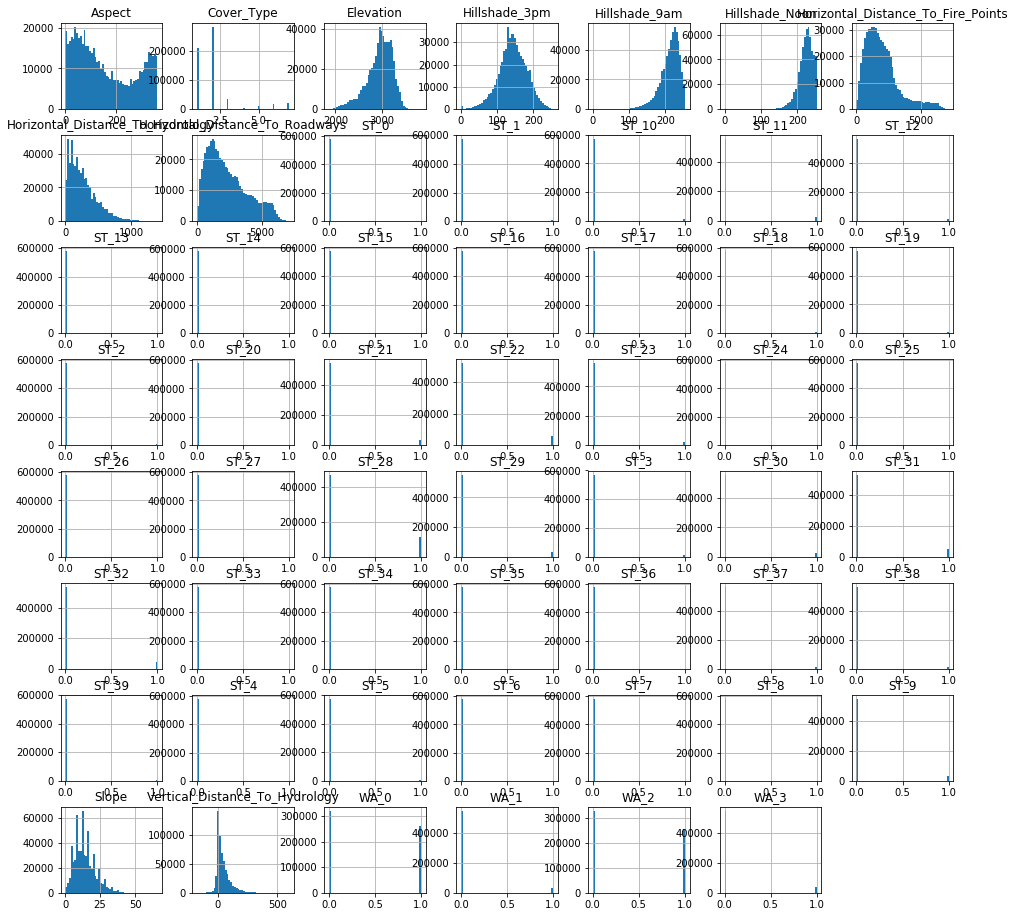

In [17]:
%pylab inline

df.hist(bins=50,figsize=(16,16));

In [18]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'WA_0', 'WA_1', 'WA_2', 'WA_3',
       'ST_0', 'ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6', 'ST_7', 'ST_8',
       'ST_9', 'ST_10', 'ST_11', 'ST_12', 'ST_13', 'ST_14', 'ST_15', 'ST_16',
       'ST_17', 'ST_18', 'ST_19', 'ST_20', 'ST_21', 'ST_22', 'ST_23', 'ST_24',
       'ST_25', 'ST_26', 'ST_27', 'ST_28', 'ST_29', 'ST_30', 'ST_31', 'ST_32',
       'ST_33', 'ST_34', 'ST_35', 'ST_36', 'ST_37', 'ST_38', 'ST_39',
       'Cover_Type'],
      dtype='object')

In [24]:
current_path = %pwd

In [27]:
path='covtype.data'
inputRDD=sc.textFile(os.path.join(current_path, path))
inputRDD

/home/jovyan/work/CSE255-DSE230-2018/Sections/Data/covtype/covtype.data MapPartitionsRDD[6] at textFile at NativeMethodAccessorImpl.java:0

In [28]:
inputRDD.first()

'2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5'

In [28]:
Data=inputRDD.map(lambda line: [float(x) for x in line.split(',')])\
    .map(lambda V:LabeledPoint(V[-1],V[:-1]))
Data.first()

LabeledPoint(5.0, [2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [33]:
(trainingData,testData)=Data.randomSplit([0.7,0.3])

### Gradient-Boosted Decision trees
Documentation: http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#module-pyspark.mllib.tree

In [35]:
model=GradientBoostedTrees.trainClassifier(trainingData,categoricalFeaturesInfo={},numIterations=3)

In [36]:
print(model.toDebugString())

TreeEnsembleModel classifier with 3 trees

  Tree 0:
    If (feature 0 <= 2558.0)
     If (feature 10 <= 0.0)
      If (feature 0 <= 2471.0)
       Predict: 6.770351720454719
      Else (feature 0 > 2471.0)
       Predict: 5.740438796307397
     Else (feature 10 > 0.0)
      If (feature 9 <= 4578.0)
       Predict: 2.9670912951167727
      Else (feature 9 > 4578.0)
       Predict: 4.136960600375234
    Else (feature 0 > 2558.0)
     If (feature 0 <= 3317.0)
      If (feature 0 <= 2918.0)
       Predict: 3.3723028053456883
      Else (feature 0 > 2918.0)
       Predict: 2.1607261897547336
     Else (feature 0 > 3317.0)
      If (feature 12 <= 0.0)
       Predict: 4.217128874388255
      Else (feature 12 > 0.0)
       Predict: 7.578162967762839
  Tree 1:
    If (feature 0 <= 2960.0)
     If (feature 0 <= 2921.0)
      If (feature 0 <= 2898.0)
       Predict: 4.090717211786396E-4
      Else (feature 0 > 2898.0)
       Predict: 0.002271467388852949
     Else (feature 0 > 2921.0)
      If (